# Learning rate and batch size

In [1]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.utils import to_categorical


## Leer el conjunto de datos

Leer el conjunto mnist pero quedarse solo con los primeros 10000 ejemplos del training para que sea más rápido el entrenamiento.

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[:10000,:,:]
train_labels = train_labels[:10000]
print(train_images.shape, train_labels.shape)

(10000, 28, 28) (10000,)


## Preparar los datos

Aplanar las imágenes y ponerlas en rango [0, 1]

Ajustar la salida para usar softmax

In [3]:
train_images = train_images.reshape((10000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Seleccionar un buen lr

Para seleccionar un buen learning rate podemos probar varios y graficar la pérdida.

El historial de la pérdida durante el entrenamiento es una variable que regresa el método fit.

Ejecute las siguientes celdas

In [5]:
learning_rates = [.01, .1, 1, 5]
history = []
for lr in learning_rates:
    network = models.Sequential()
    network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
    network.add(layers.Dense(64, activation='sigmoid'))
    network.add(layers.Dense(10, activation='softmax'))

    optimizer = SGD(lr=lr)
    network.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    print("-" * 50)
    print("Training with lr:", lr)
    hist = network.fit(train_images, train_labels, epochs=10, batch_size=256, verbose=1)
    history.append(hist)

/home/david/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


--------------------------------------------------
Training with lr: 0.01
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 2.3651 - accuracy: 0.1147
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 2.3012 - accuracy: 0.1178
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 2.2880 - accuracy: 0.1189
Epoch 4/10
40/40 [==============================] - 0s 5ms/step - loss: 2.2808 - accuracy: 0.1677
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 2.2745 - accuracy: 0.2074
Epoch 6/10
40/40 [==============================] - 0s 5ms/step - loss: 2.2682 - accuracy: 0.2421
Epoch 7/10
40/40 [==============================] - 0s 5ms/step - loss: 2.2619 - accuracy: 0.1961
Epoch 8/10
40/40 [==============================] - 0s 5ms/step - loss: 2.2555 - accuracy: 0.2857
Epoch 9/10
40/40 [==============================] - 0s 5ms/step - loss: 2.2489 - accuracy: 0.3055
Epoch 10/10
40/40 [=========================

Aquí graficamos la périda y el accurcy

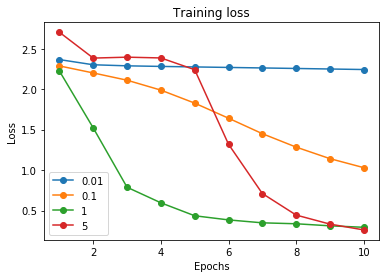

In [6]:
for hist, lr in zip(history, learning_rates):
    loss = hist.history['loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'o-', label=lr)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

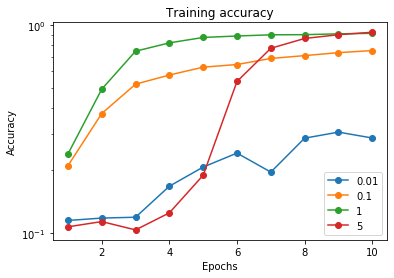

In [7]:
for hist, lr in zip(history, learning_rates):
    loss = hist.history['accuracy']
    epochs = range(1, len(loss) + 1)
    plt.semilogy(epochs, loss, 'o-', label=lr)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**¿Cuál learning rate obtuvo mejores resultados?**

El learning rate de 1 fue el que obtuvo mejores resultados.

**Compare con la gráfica que vimos en clase sobre cómo seleccionar un buen learning rate.**

Según la gráfica para seleccionar el mejor learning rate, los valores 0.01 y 0.1 tienen un learning rate muy bajo y la pérdida no tiene una disminución considerable. El learning rate de 5, a pesar de que sí disminuye el valor de pérdida, se queda estancado en las epochs de 2, 3 y 4. El learning rate de 1 es con el que el valor de pérdida siempre disminuye.

# Hacer lo mismo modificando solo el parámetro batch_size

Usar la misma configuración de red neuronal con learning rate = 1

Después graficar la pérdida y el accuracy para cada batch_size

In [13]:
batch_size = [64, 128, 256, 512]
history = []
for bs in batch_size:
    network = models.Sequential()
    network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
    network.add(layers.Dense(64, activation='sigmoid'))
    network.add(layers.Dense(10, activation='softmax'))

    optimizer = SGD(lr=1)
    network.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    print("-" * 50)
    print("Training with batch size:", bs)
    hist = network.fit(train_images, train_labels, epochs=10, batch_size=256, verbose=1)
    history.append(hist)

/home/david/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


--------------------------------------------------
Training with batch size: 64
Epoch 1/10
40/40 [==============================] - 1s 7ms/step - loss: 2.1504 - accuracy: 0.2585
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 1.3297 - accuracy: 0.5687
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.7093 - accuracy: 0.7798
Epoch 4/10
40/40 [==============================] - 0s 5ms/step - loss: 0.5338 - accuracy: 0.8343
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 0.4470 - accuracy: 0.8614
Epoch 6/10
40/40 [==============================] - 0s 5ms/step - loss: 0.4033 - accuracy: 0.8810
Epoch 7/10
40/40 [==============================] - 0s 5ms/step - loss: 0.3618 - accuracy: 0.8923
Epoch 8/10
40/40 [==============================] - 0s 5ms/step - loss: 0.3490 - accuracy: 0.8993
Epoch 9/10
40/40 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.9152
Epoch 10/10
40/40 [===================

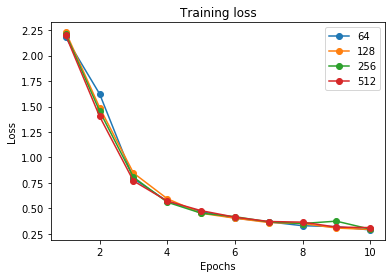

In [9]:
for hist, bs in zip(history, batch_size):
    loss = hist.history['loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'o-', label=bs)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

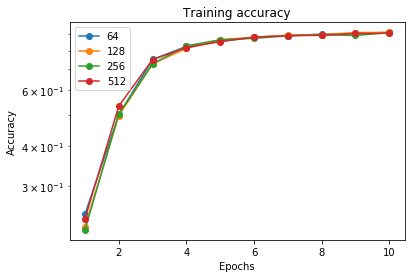

In [10]:
for hist, bs in zip(history, batch_size):
    loss = hist.history['accuracy']
    epochs = range(1, len(loss) + 1)
    plt.semilogy(epochs, loss, 'o-', label=bs)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**- ¿Con qué valores de batch size se reduce más la pérdida? ¿Por qué?**

Con el batch size de 64 se reduce más la pérdida, con un valor de 0.2866; mientras que el batch size de 128 tiene un valor de 0.2893, el de 256 tiene un valor de 0.2910 y el de 512 tiene un valor de 0.2871. El valor de 64 tiene mejor rendimiento; es sabido que batch sizes pequeños convergen más rápido a soluciones buenas y que permiten que el modelo empiece a aprender antes de ver todos los datos.

**- ¿Con qué valores de batch size tarda menos el entrenamiento?**

Con el batch size de 512 es con el que se tarda menos el entrenamiento, al tener una muestra más grande para el procesamiento.